In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
df_er = pd.read_excel (r'/Users/brianyu/Desktop/Term Project/Data_COMP5212project_brian.xlsx', sheet_name='ER')
print (df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [3]:
df_er['datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [4]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [5]:
df_er=df_er.drop(columns='Date')

In [6]:
df_var = pd.read_excel (r'/Users/brianyu/Desktop/Term Project/Data_COMP5212project_brian.xlsx', sheet_name='Variables')

In [7]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,...,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,...,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,...,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,...,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,...,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,...,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [8]:
df_var['datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,...,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,...,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,...,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,...,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,...,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,...,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01


In [9]:
df_var=df_var.drop(columns='Date')

In [10]:
df_all=df_er.set_index('datetime',drop=False).join(df_var.set_index('datetime'))

In [11]:
df_all.head()

,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,datetime,Shanghai,SP500,...,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01,1134.67,1279.64,...,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01,1090.09,1238.33,...,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01,1158.05,1286.37,...,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01,1120.93,1335.18,...,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01,1279.33,1301.84,...,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [12]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19', 'DLTINT_USEA']]

In [13]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA
datetime,,,,,,,,,,,,
1999-01-01,1.1366,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220,0.8980
1999-02-01,1.1025,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742,1.0258
1999-03-01,1.0770,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810,1.0490
1999-04-01,1.0570,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407,1.1393
1999-05-01,1.0423,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049,1.3351


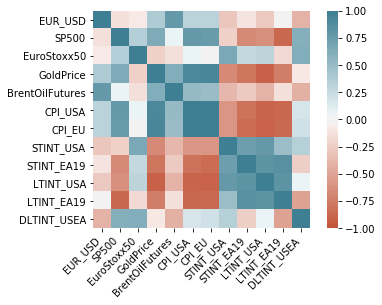

In [14]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Mean Absolute Error: 0.04 degrees.
MAE: 0.041917605820105876
MSE: 0.0028556926763981475
RMSE: 0.05343868146200978
R-squared:  -0.3251459077229064
Accuracy: 96.34 %.


/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Predictions')

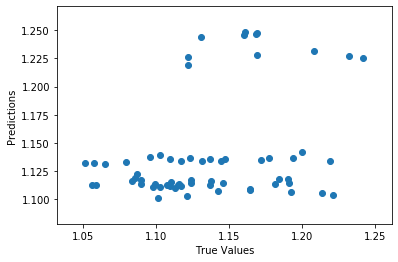

In [15]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]
test_size=0.3
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = test_size, shuffle=False) #split data without shuffling

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = regressor.predict(usdeu_x_test)

# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")


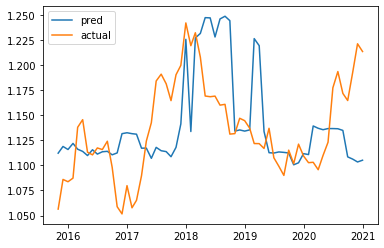

In [16]:
predictions=pd.Series(predictions,index=usdeu_y_test.index)
plt.plot(predictions)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()

In [17]:
#one-step ahead predictions
df_len=len(df_usdeu) #to return the number of items in a list
print(df_len)

209


In [18]:
start_pred_pos=int(df_len*(1-test_size))#where test size is 30%
print(start_pred_pos)#there are 209 data, using last 30% for test i.e. start from 146

146


In [19]:
RFR_prediction=[]
for i in range(start_pred_pos,df_len):
    #print(i) # the result is 146 to 208
    #regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
    RFR=RandomForestRegressor().fit(df_usdeu[:i], usdeu_y[1:i+1])#using the one step befroe index to predict next rate 
    #print(df_usdeu[:i])
    # #print(len(df_usdeu[:i])) #result is 208
    RFR_pred=RFR.predict(df_usdeu[i:i+1])
    RFR_prediction.append(RFR_pred[0])# to add an item to the end of the list i.e. 146+1 until 208
RFR_prediction=pd.Series(RFR_prediction,index=usdeu_y_test.index)


63
63


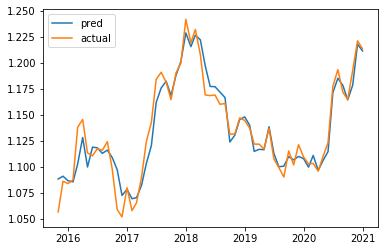

Mean Absolute Error: 0.04 degrees.
MAE: 0.008690824703955664
MSE: 0.0001491062191446152
RMSE: 0.012210905746283328
R-squared:  0.9308092576807891
Accuracy: 96.34 %.


Text(0, 0.5, 'Predictions')

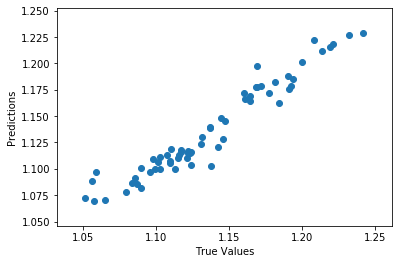

In [20]:
print(len(RFR_prediction))
print(len(usdeu_y_test))
plt.plot(RFR_prediction)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()
errors=RFR_prediction-usdeu_y_test
AE=abs(errors)

# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, RFR_prediction))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, RFR_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, RFR_prediction)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, RFR_prediction)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, RFR_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

MAE: 0.017109523809523807
MSE: 0.0004763341269841271
RMSE: 0.021825080228583975
R-squared:  0.7789635333316328
Accuracy: 98.5 %.


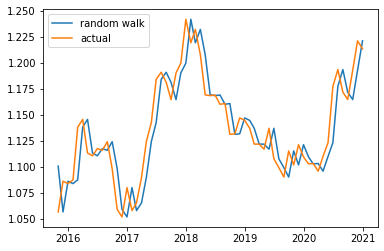

In [21]:

#random walk model without drift
eurusd_pred_rw = df_usdeu["EUR_USD"].shift(1)
errors_rw = eurusd_pred_rw[start_pred_pos:] - df_usdeu["EUR_USD"][start_pred_pos:]
plt.plot(eurusd_pred_rw[start_pred_pos:])
plt.plot(df_usdeu["EUR_USD"][start_pred_pos:])
plt.legend(["random walk","actual"]) 
#print(errors_rw)

AE_rw=abs(errors_rw)

print('MAE:', metrics.mean_absolute_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('MSE:', metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])))
print ('R-squared: ',metrics.r2_score(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])) 

# Calculate mean absolute percentage error (MAPE)
mape_rw = 100 * (AE_rw / df_usdeu["EUR_USD"][start_pred_pos:])
# Calculate and display accuracy
accuracy_rw = 100 - np.mean(mape_rw)
print('Accuracy:', np.round(accuracy_rw, 2), '%.')

In [22]:
#DM tests，判别任意两类算法的预测结果是否存在差异性
from dm_test import dm_test
rt = dm_test(pd.to_numeric(usdeu_y_test),pd.to_numeric(eurusd_pred_rw[start_pred_pos:]),pd.to_numeric(RFR_prediction), h = 1, crit="MSE")
print(rt)
#p-vale<0.1 meaning that the linear predictions are statiscally different from those of random walk .

dm_return(DM=4.95929326510753, p_value=5.801326332616736e-06)


In [23]:
Pred_GingUp=RFR_prediction>usdeu_y_test.shift(1)
actual_GoingUP=usdeu_y_test>usdeu_y_test.shift(1)
print("going_up accuracy: ",(Pred_GingUp==actual_GoingUP).mean())
#print(len(Pred_GingUp))
#print(len(lin_preds_1))
#print(usdeu_y_test.shift(1))
#print(usdeu_y_test)
#print(lin_preds_1)

going_up accuracy:  0.8253968253968254
